In [31]:
from sklearn.model_selection import train_test_split

In [32]:
import pandas as pd
df = pd.read_csv(r"C:\Users\ROG\Desktop\project 01\heart_failure_clinical_records (1).csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [33]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


C:\Users\ROG\AppData\Local\Temp\ipykernel_20748\2861989957.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='DEATH_EVENT', palette='Set2')


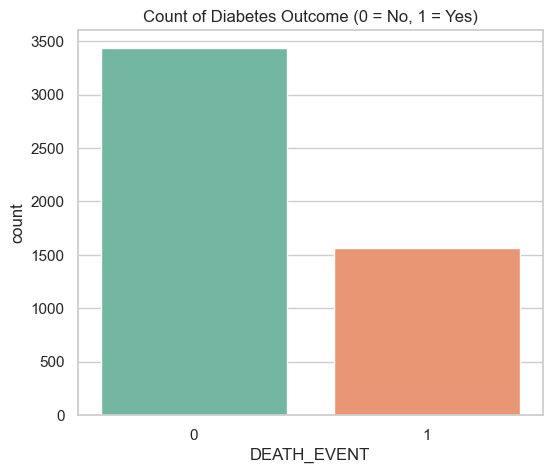

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Set Seaborn style
sns.set(style="whitegrid", palette="pastel")

# 1. Count Plot of Outcome

plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='DEATH_EVENT', palette='Set2')
plt.title("Count of Diabetes Outcome (0 = No, 1 = Yes)")
plt.show()
print()
print()

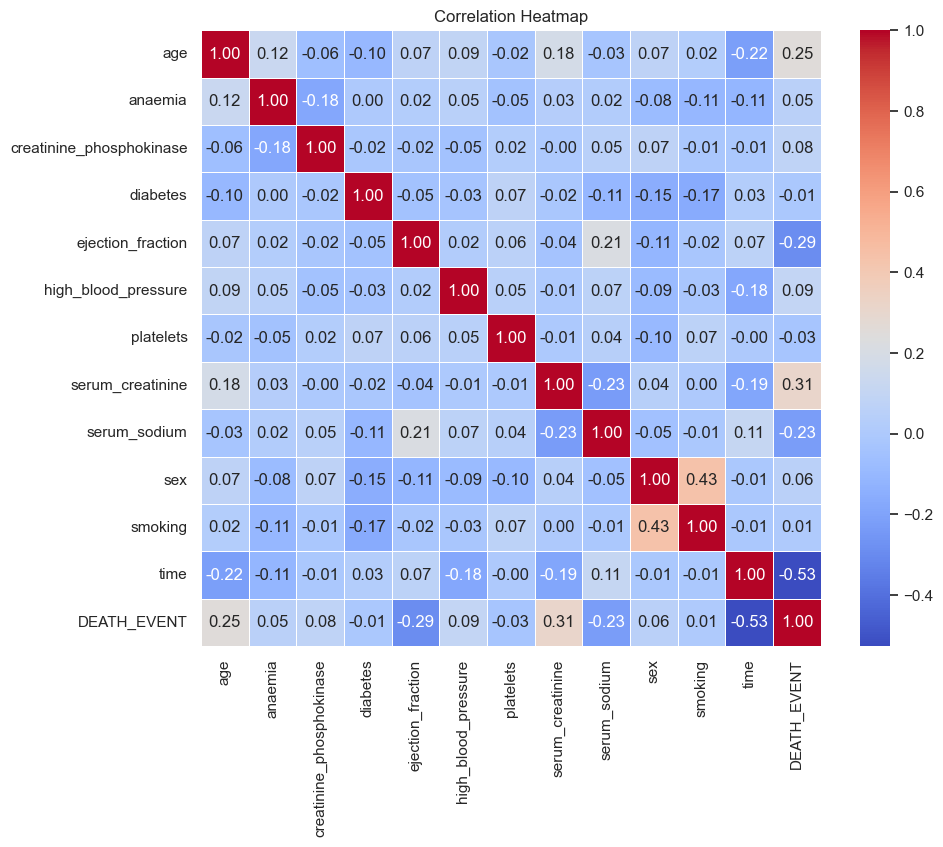

In [36]:
# 2. Correlation Heatmap

plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
print()
print()

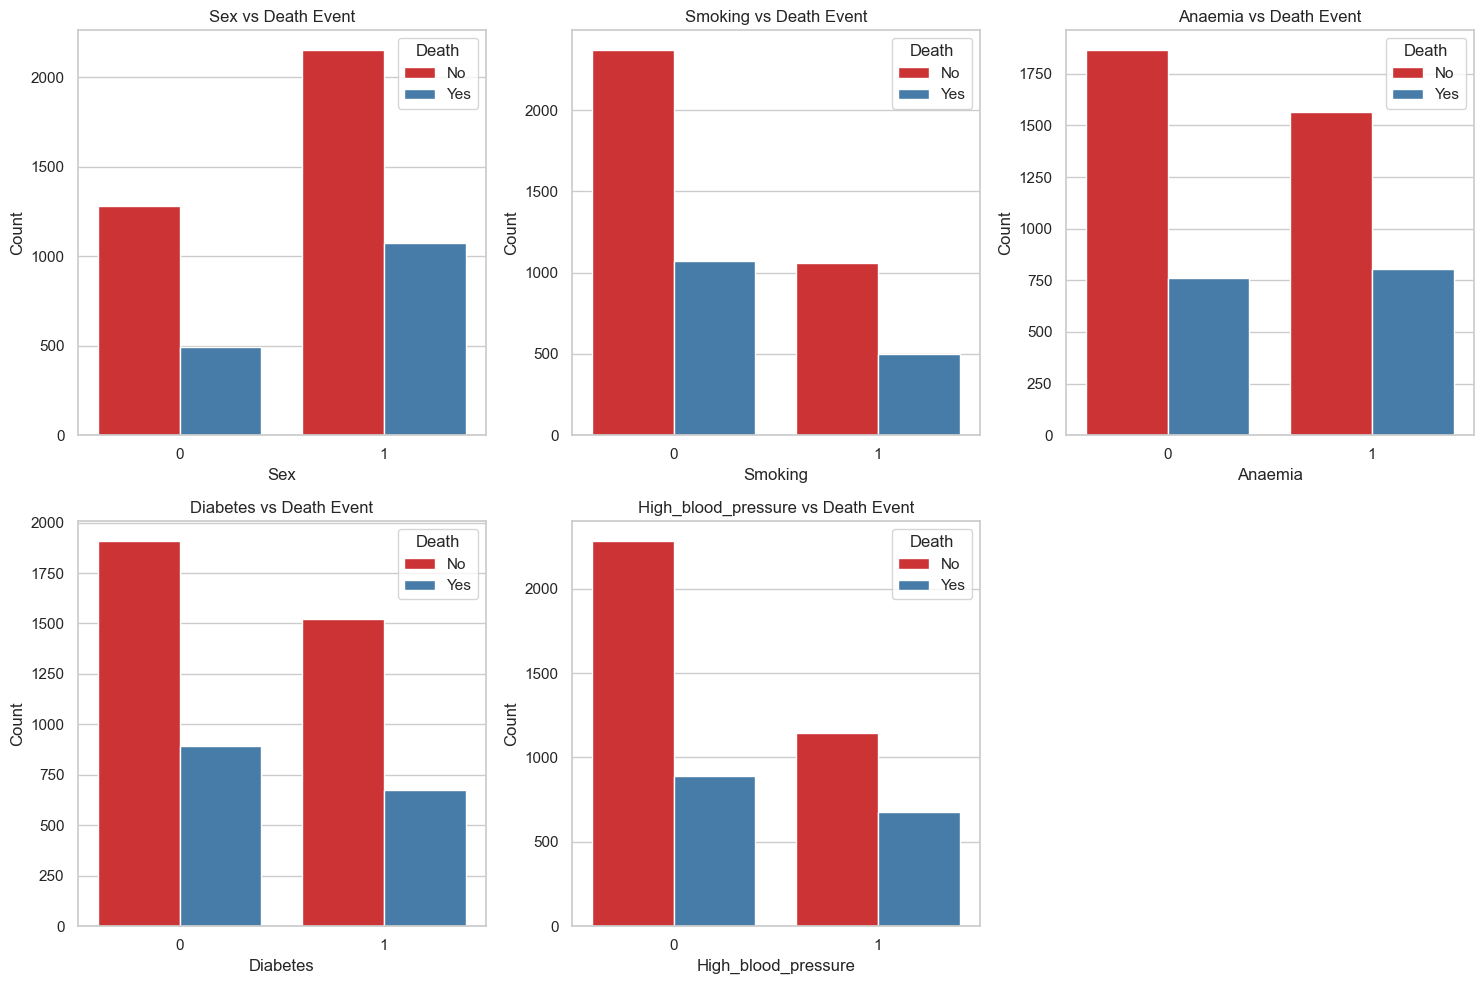

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_features = ['sex', 'smoking', 'anaemia', 'diabetes', 'high_blood_pressure']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=df, x=feature, hue="DEATH_EVENT", palette="Set1")
    plt.title(f"{feature.capitalize()} vs Death Event")
    plt.xlabel(feature.capitalize())
    plt.ylabel("Count")
    plt.legend(title="Death", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

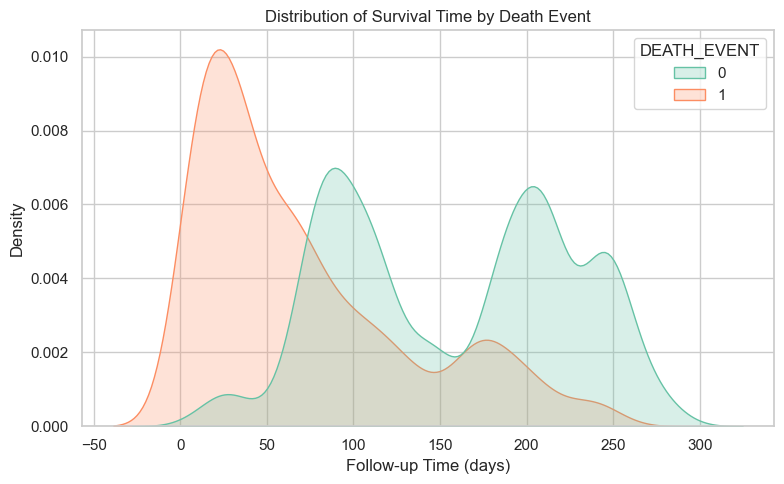

In [38]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x="time", hue="DEATH_EVENT", fill=True, common_norm=False, palette="Set2")
plt.title("Distribution of Survival Time by Death Event")
plt.xlabel("Follow-up Time (days)")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

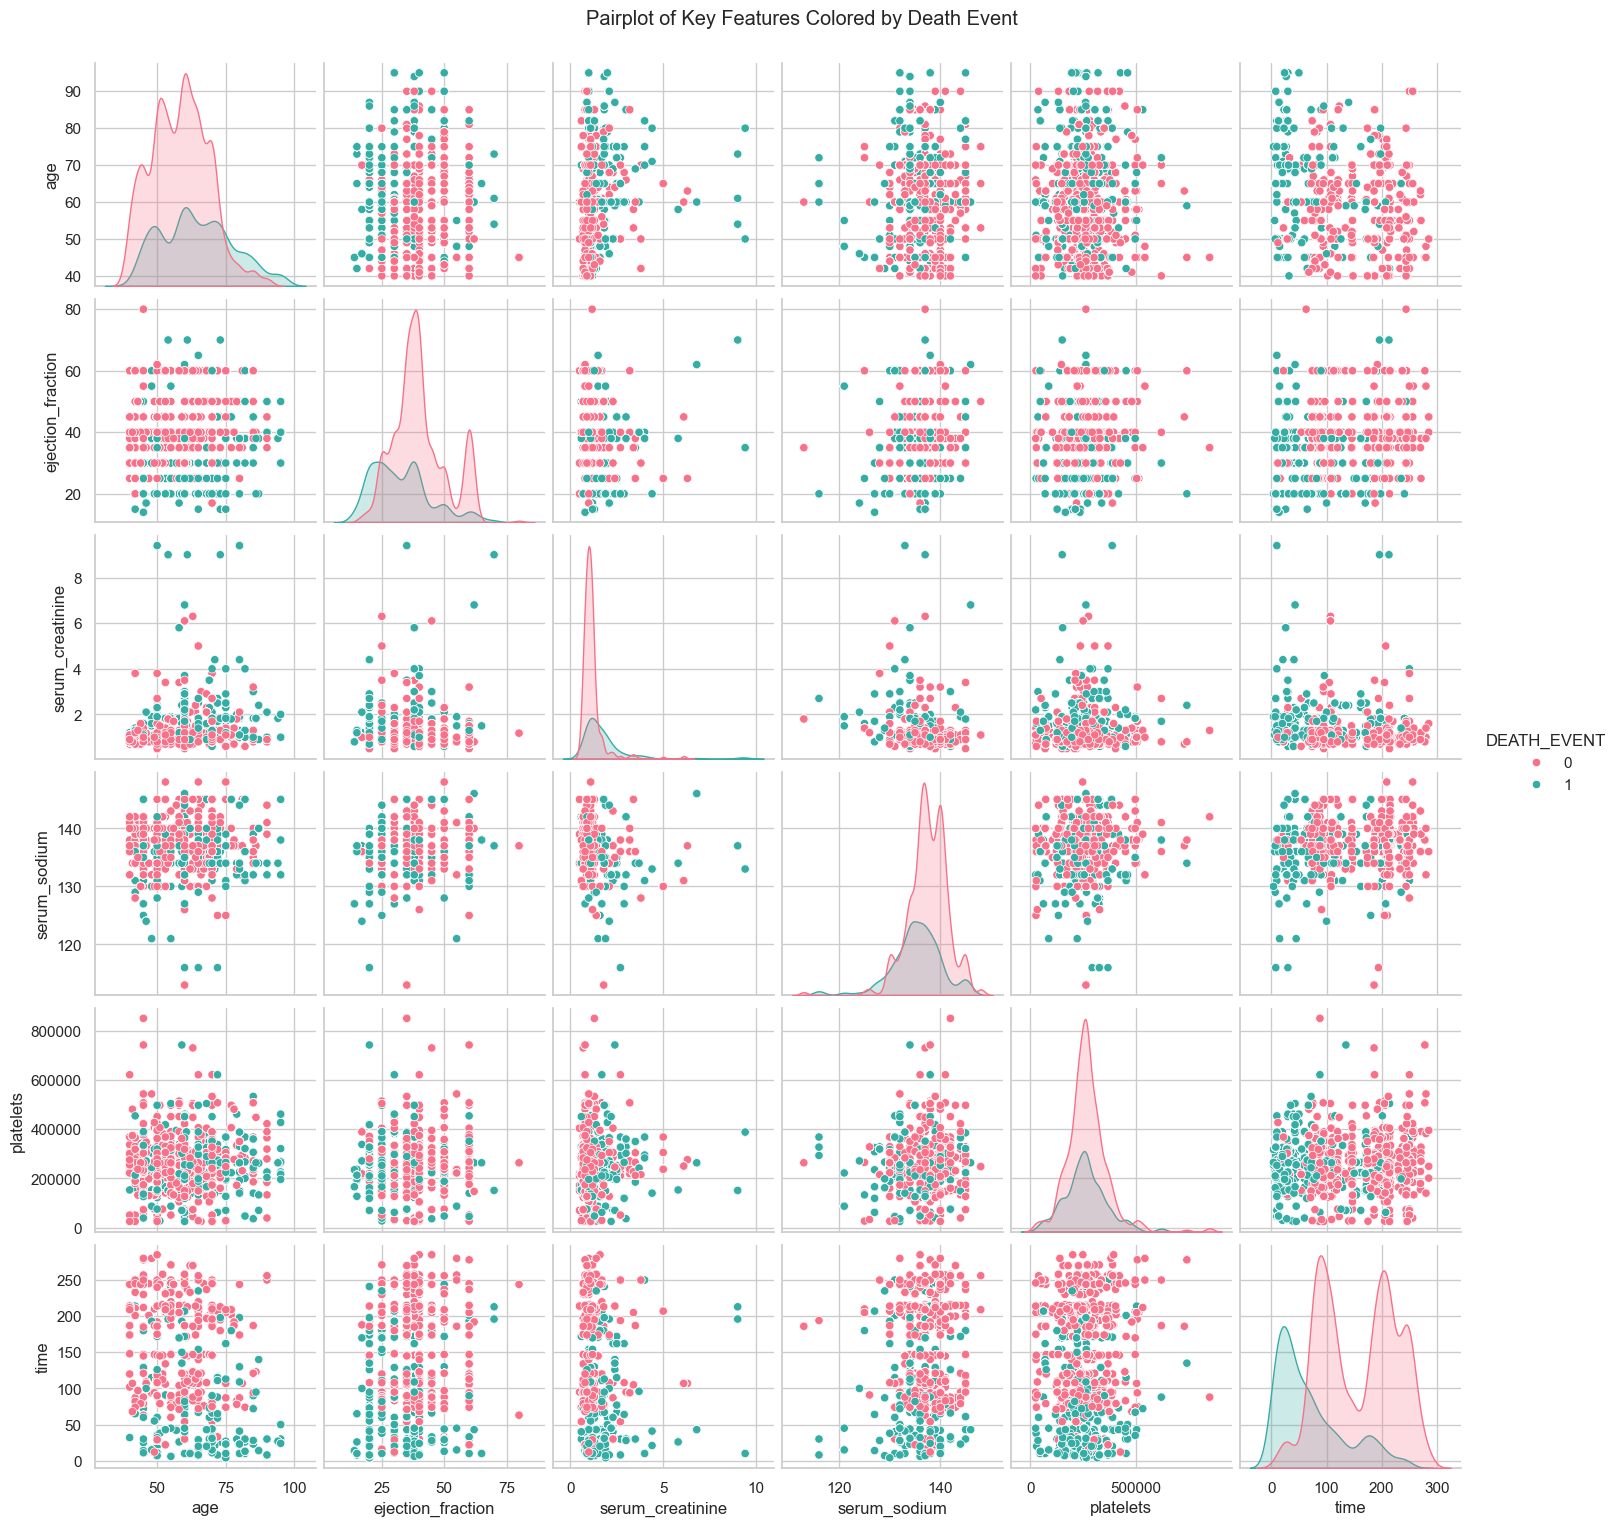

In [39]:
import seaborn as sns

# Select important numeric features
features = ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'platelets', 'time', 'DEATH_EVENT']
sns.pairplot(df[features], hue="DEATH_EVENT", palette="husl")
plt.suptitle("Pairplot of Key Features Colored by Death Event", y=1.02)
plt.show()

C:\Users\ROG\AppData\Local\Temp\ipykernel_20748\3897333343.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='DEATH_EVENT', y=feature, palette='Set2', inner='quartile')
C:\Users\ROG\AppData\Local\Temp\ipykernel_20748\3897333343.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='DEATH_EVENT', y=feature, palette='Set2', inner='quartile')
C:\Users\ROG\AppData\Local\Temp\ipykernel_20748\3897333343.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='DEATH_EVENT', y=feature, palette='Set2', inner='qua

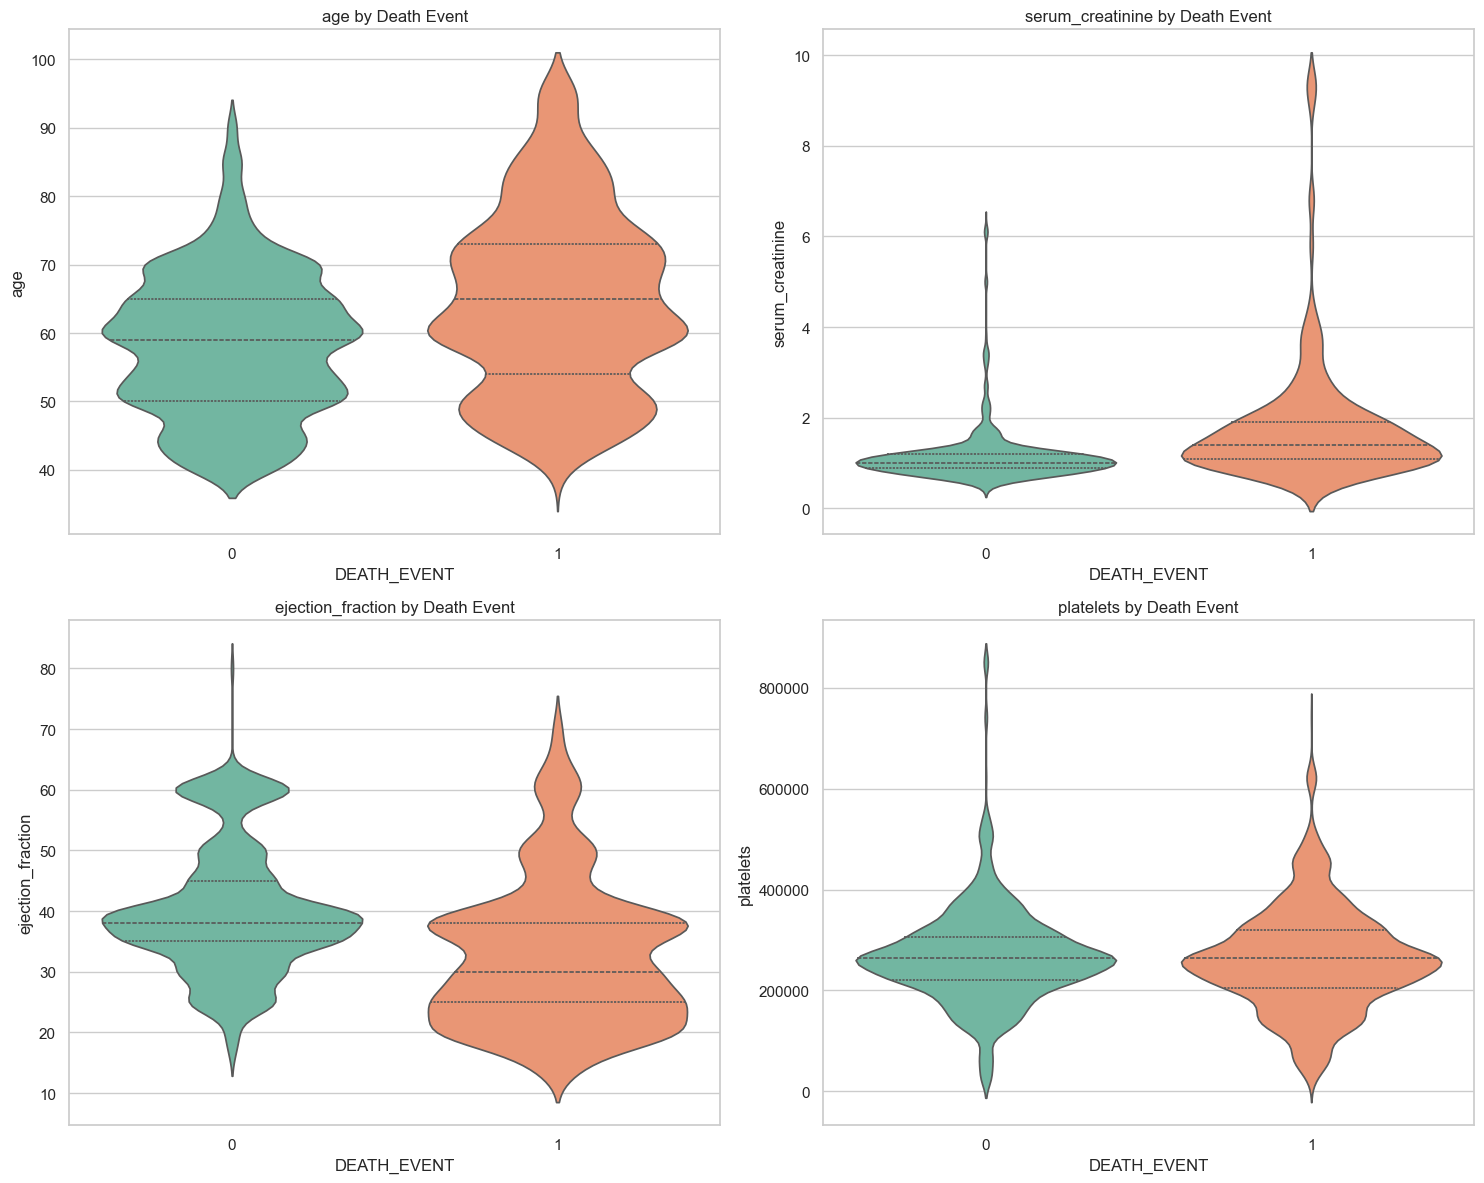

In [40]:
plt.figure(figsize=(15, 12))
for i, feature in enumerate(['age', 'serum_creatinine', 'ejection_fraction', 'platelets']):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(data=df, x='DEATH_EVENT', y=feature, palette='Set2', inner='quartile')
    plt.title(f"{feature} by Death Event")
plt.tight_layout()
plt.show()

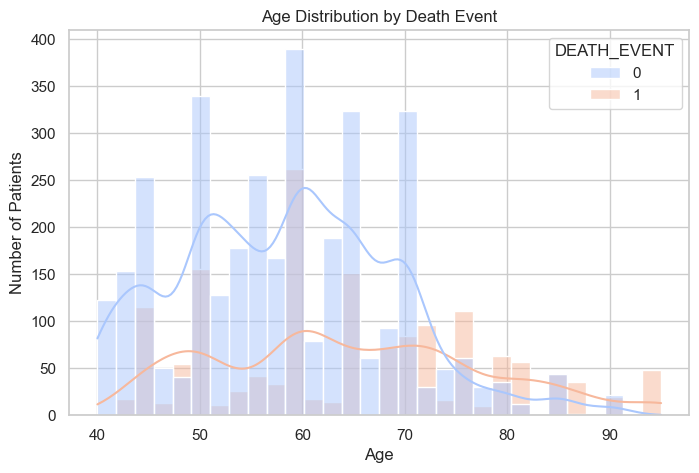

In [41]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='age', hue='DEATH_EVENT', kde=True, bins=30, palette="coolwarm")
plt.title("Age Distribution by Death Event")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.show()

C:\Users\ROG\anaconda3\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\ROG\anaconda3\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

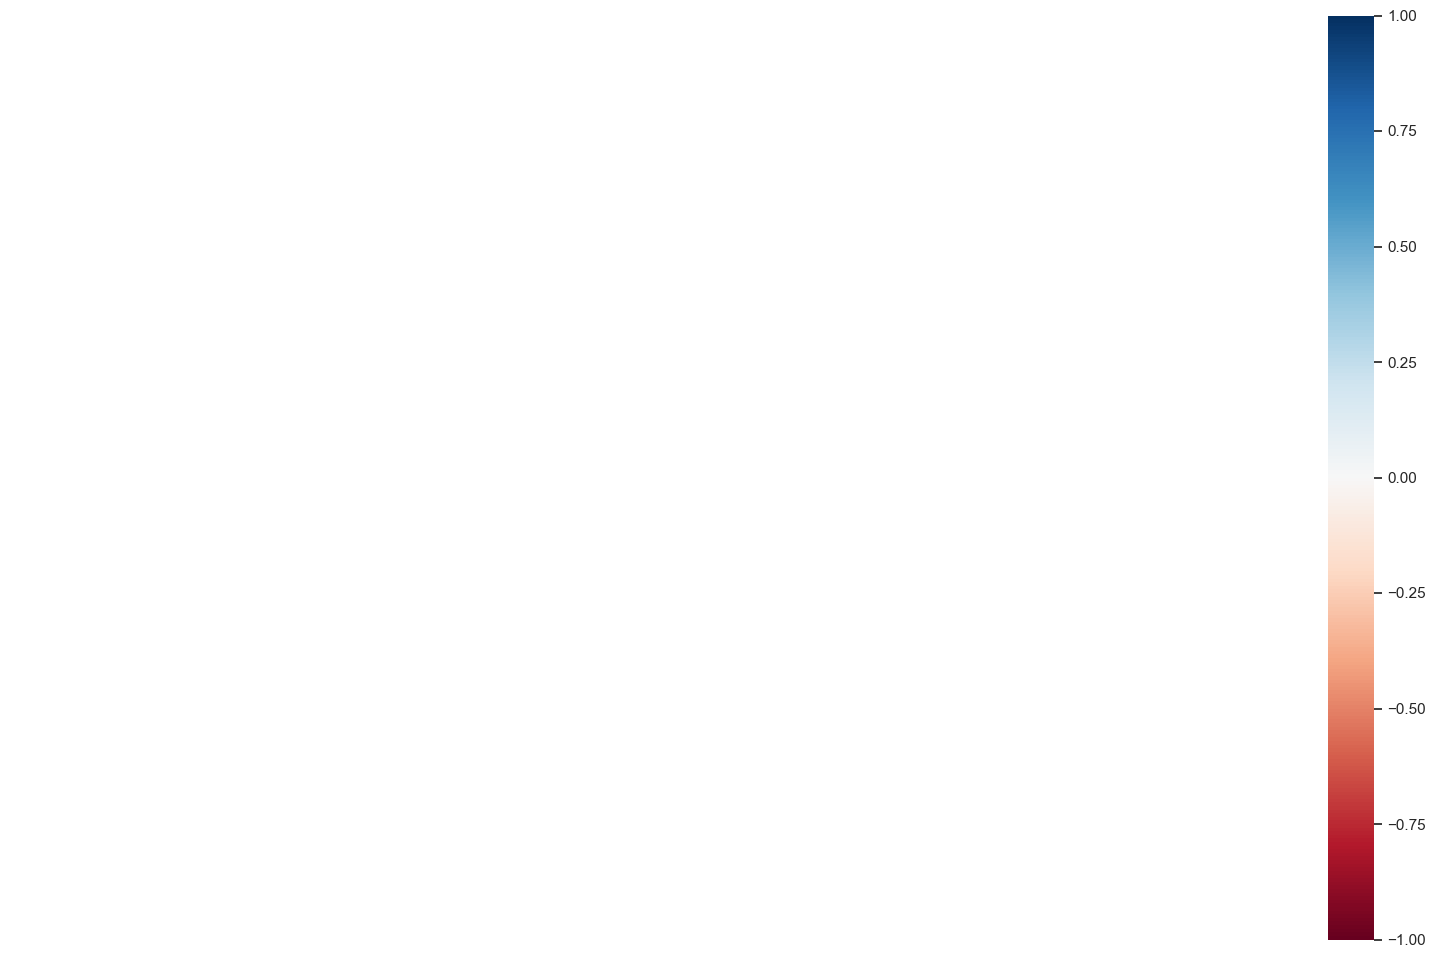

In [43]:
import missingno as msno
msno.heatmap(df)

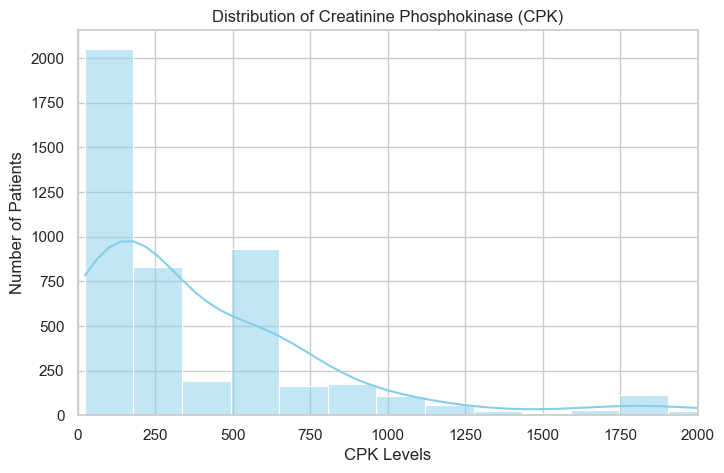

In [44]:
plt.figure(figsize=(8, 5))
sns.histplot(df['creatinine_phosphokinase'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Creatinine Phosphokinase (CPK)")
plt.xlabel("CPK Levels")
plt.ylabel("Number of Patients")
plt.xlim(0, 2000)  # To handle outliers
plt.show()

In [45]:
# Define feature matrix X and target vector y
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


# Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Logistic Regression Results:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Results:
Accuracy : 0.8330
Precision: 0.7258
Recall   : 0.7185
F1 Score : 0.7221

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       698
           1       0.73      0.72      0.72       302

    accuracy                           0.83      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.83      0.83      0.83      1000



C:\Users\ROG\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
from sklearn.svm import SVC

# Initialize and train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict
y_pred = svm_model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Support Vector Machine (SVM) Results:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Support Vector Machine (SVM) Results:
Accuracy : 0.8410
Precision: 0.7992
Recall   : 0.6325
F1 Score : 0.7061

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       698
           1       0.80      0.63      0.71       302

    accuracy                           0.84      1000
   macro avg       0.83      0.78      0.80      1000
weighted avg       0.84      0.84      0.84      1000



In [56]:
from sklearn.ensemble import RandomForestClassifier


# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Output
print(" Random Forest Classifier Results:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

 Random Forest Classifier Results:
Accuracy : 0.9920
Precision: 0.9868
Recall   : 0.9868
F1 Score : 0.9868

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       698
           1       0.99      0.99      0.99       302

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



In [57]:
from sklearn.tree import DecisionTreeClassifier


# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred = dt_model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print("Decision Tree Classifier Results:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Decision Tree Classifier Results:
Accuracy : 0.9870
Precision: 0.9769
Recall   : 0.9801
F1 Score : 0.9785

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       698
           1       0.98      0.98      0.98       302

    accuracy                           0.99      1000
   macro avg       0.98      0.99      0.98      1000
weighted avg       0.99      0.99      0.99      1000



In [61]:
from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

# Print results
print("XGBoost Classifier Results:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Classifier Results:
Accuracy : 0.9920
Precision: 0.9836
Recall   : 0.9901
F1 Score : 0.9868

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       698
           1       0.98      0.99      0.99       302

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



C:\Users\ROG\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:47:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [64]:
from lightgbm import LGBMClassifier

# Train LightGBM model
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

# Predict
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred_lgbm)
precision = precision_score(y_test, y_pred_lgbm)
recall = recall_score(y_test, y_pred_lgbm)
f1 = f1_score(y_test, y_pred_lgbm)

# Print results
print("LightGBM Classifier Results:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgbm))

[LightGBM] [Info] Number of positive: 1266, number of negative: 2734
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 687
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.316500 -> initscore=-0.769903
[LightGBM] [Info] Start training from score -0.769903
LightGBM Classifier Results:
Accuracy : 0.9930
Precision: 0.9868
Recall   : 0.9901
F1 Score : 0.9884

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       698
           1       0.99      0.99      0.99       302

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99     

C:\Users\ROG\AppData\Local\Temp\ipykernel_20748\1918280077.py:44: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ROG\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


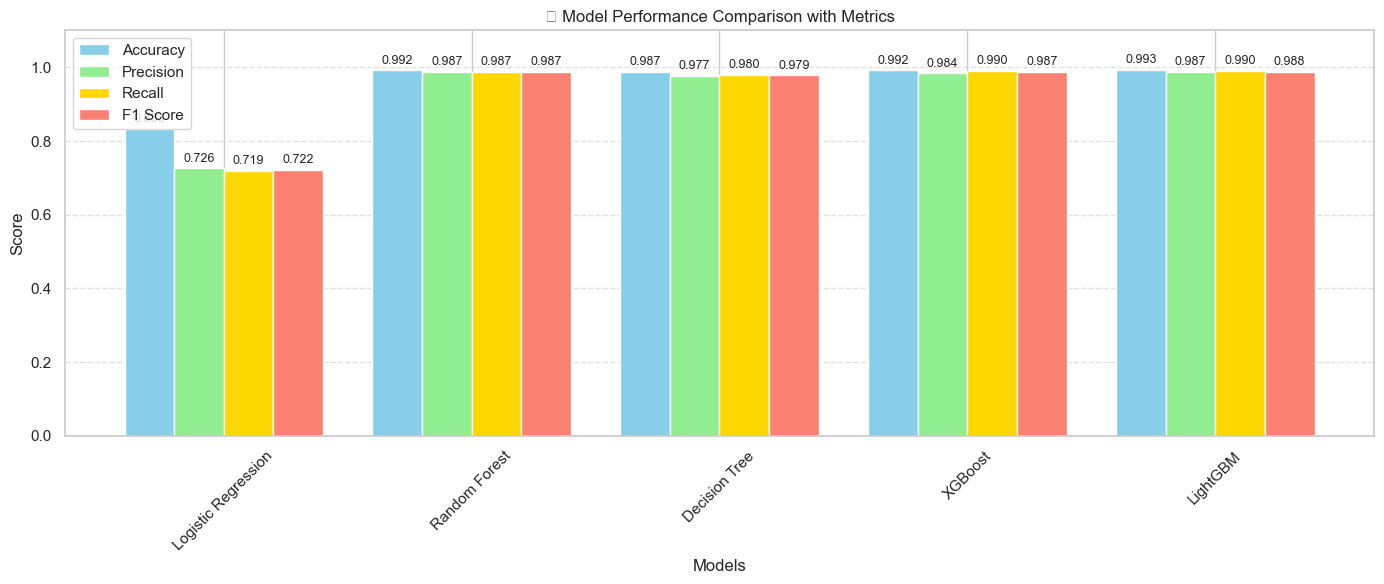

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = [
    "Logistic Regression",
    "Random Forest",
    "Decision Tree",
    "XGBoost",
    "LightGBM"
]

# Metric values
accuracy  = [0.8330,  0.9920, 0.9870, 0.9920, 0.9930]
precision = [0.7258,  0.9868, 0.9769, 0.9836, 0.9868]
recall    = [0.7185,  0.9868, 0.9801, 0.9901, 0.9901]
f1_score  = [0.7221,  0.9868, 0.9785, 0.9868, 0.9884]

# Bar width and x locations
x = np.arange(len(models))
width = 0.2

# Plot setup
plt.figure(figsize=(14, 6))
bars1 = plt.bar(x - 1.5*width, accuracy, width, label='Accuracy', color='skyblue')
bars2 = plt.bar(x - 0.5*width, precision, width, label='Precision', color='lightgreen')
bars3 = plt.bar(x + 0.5*width, recall, width, label='Recall', color='gold')
bars4 = plt.bar(x + 1.5*width, f1_score, width, label='F1 Score', color='salmon')

# Add value labels
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.3f}", ha='center', va='bottom', fontsize=9)

# Formatting
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("🔍 Model Performance Comparison with Metrics")
plt.xticks(x, models, rotation=45)
plt.ylim(0, 1.10)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Show plot
plt.show()

In [66]:
import joblib

# Save the trained model to a .joblib file
joblib.dump(rf_model, 'random_forest_model.joblib')

print("Model saved as 'random_forest_model.joblib'")

Model saved as 'random_forest_model.joblib'


In [ ]:
import joblib
import numpy as np

# Load the model
model = joblib.load('random_forest_model.joblib')

# Ask user for input (update the prompt based on your features)
print("Enter input values for prediction:")

# Example for 3 input features (you can change to match your model)
feature_1 = float(input("Enter Feature 1: "))
feature_2 = float(input("Enter Feature 2: "))
feature_3 = float(input("Enter Feature 3: "))
feature_4 = float(input("Enter Feature 4: "))
feature_5 = float(input("Enter Feature 5: "))
feature_6 = float(input("Enter Feature 6: "))
feature_7 = float(input("Enter Feature 7: "))
feature_8 = float(input("Enter Feature 8: "))
feature_9 = float(input("Enter Feature 9: "))
feature_10 = float(input("Enter Feature 10: "))
feature_11= float(input("Enter Feature 11:"))
feature_12 = float(input("Enter Feature 12: "))

# Combine inputs into array
user_input = np.array([[feature_1, feature_2, feature_3,feature_4, feature_5, feature_6,feature_7, feature_8, feature_9,feature_10, feature_11, feature_12]])

# Predict
prediction = model.predict(user_input)

# Output
print("\n✅ Prediction Result:")
print("Predicted Class:", prediction[0])

Enter input values for prediction:
